<a href="https://colab.research.google.com/github/Nazari-Fariba/RQ/blob/main/RingQuest-Colab.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

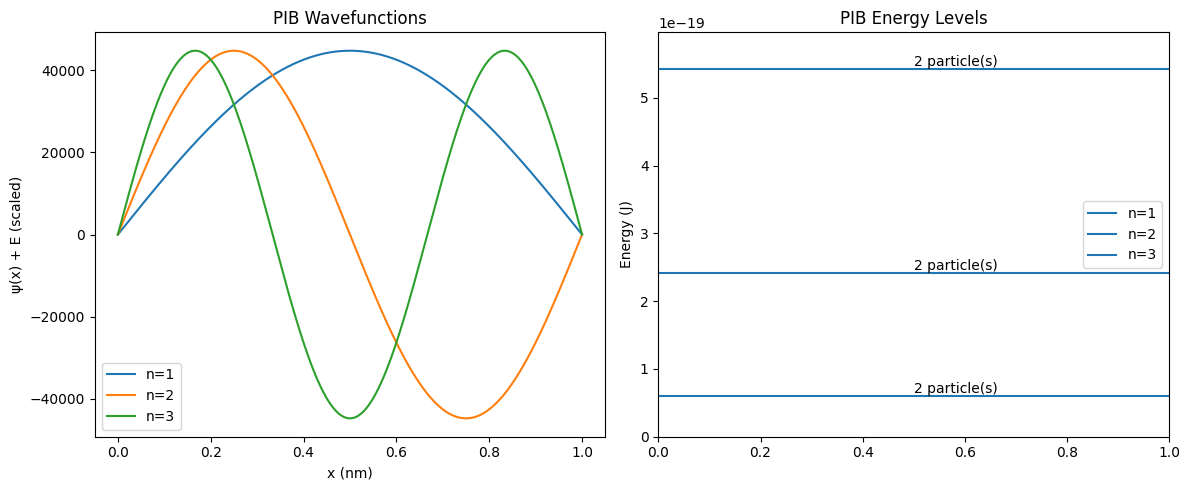

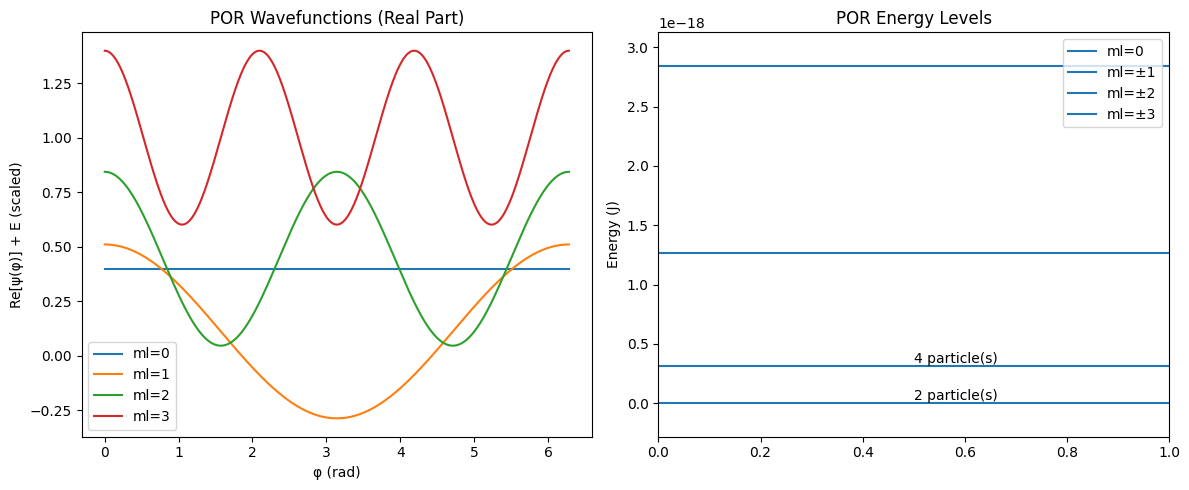

PIB Energy (6 particles): 1.69e-18 J
POR Energy (6 particles): 1.26e-18 J
Aromatic Stabilization Energy: 4.23e-19 J


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

# Physical constants
hbar = 1.0545718e-34
m_e = 9.1093837e-31

# PIB Model Functions
def pib_wavefunction(x, n, L):
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)

def pib_energy(n, L):
    return (hbar**2 * np.pi**2 * n**2) / (2 * m_e * L**2)

def plot_pib(L, n_max=3, num_particles=1):
    x = np.linspace(0, L, 1000)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    max_energy = pib_energy(n_max, L)
    for n in range(1, n_max + 1):
        psi = pib_wavefunction(x, n, L)
        energy = pib_energy(n, L)
        ax1.plot(x * 1e9, psi + energy / max_energy, label=f"n={n}")
    ax1.set_title("PIB Wavefunctions")
    ax1.set_xlabel("x (nm)")
    ax1.set_ylabel("ψ(x) + E (scaled)")
    ax1.legend()

    energies = []
    particles_filled = 0
    for n in range(1, n_max + 1):
        energy = pib_energy(n, L)
        energies.append(energy)
        ax2.axhline(energy, linestyle='-', label=f"n={n}")
        if particles_filled < num_particles:
            remaining = min(2, num_particles - particles_filled)
            ax2.text(0.5, energy, f"{remaining} particle(s)", verticalalignment='bottom')
            particles_filled += remaining
    ax2.set_title("PIB Energy Levels")
    ax2.set_ylabel("Energy (J)")
    ax2.legend()
    if energies:
        ax2.set_ylim(0, max(energies) * 1.1)
    else:
        ax2.set_ylim(0, 1e-18)

    plt.tight_layout()
    plt.show()
    return fig

# POR Model Functions
def por_wavefunction(phi, ml):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(1j * ml * phi)

def por_energy(ml, R):
    return (ml**2 * hbar**2) / (2 * m_e * R**2)

def plot_por(R, n_max=3, num_particles=1):
    phi = np.linspace(0, 2 * np.pi, 1000)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    max_energy = por_energy(n_max, R)
    for ml in range(0, n_max + 1):
        psi_real = np.real(por_wavefunction(phi, ml))
        energy = por_energy(ml, R)
        ax1.plot(phi, psi_real + energy / max_energy, label=f"ml={ml}")
    ax1.set_title("POR Wavefunctions (Real Part)")
    ax1.set_xlabel("φ (rad)")
    ax1.set_ylabel("Re[ψ(φ)] + E (scaled)")
    ax1.legend()

    energies = []
    particles_filled = 0
    for ml in range(0, n_max + 1):
        energy = por_energy(ml, R)
        energies.append(energy)
        ax2.axhline(energy, linestyle='-', label=f"ml=±{ml}" if ml > 0 else "ml=0")
        if particles_filled < num_particles:
            remaining = min(2 if ml == 0 else 4, num_particles - particles_filled)
            ax2.text(0.5, energy, f"{remaining} particle(s)", verticalalignment='bottom')
            particles_filled += remaining
    ax2.set_title("POR Energy Levels")
    ax2.set_ylabel("Energy (J)")
    ax2.legend()
    if energies:
        ax2.set_ylim(-max(energies) * 0.1, max(energies) * 1.1)
    else:
        ax2.set_ylim(-1e-20, 1e-20)

    plt.tight_layout()
    plt.show()
    return fig

# Energy Calculation
def calculate_energies(L, R, num_particles=6):
    pib_total_energy = 0
    particles_filled = 0
    n = 1
    while particles_filled < num_particles:
        energy = pib_energy(n, L)
        particles_to_add = min(2, num_particles - particles_filled)
        pib_total_energy += particles_to_add * energy
        particles_filled += particles_to_add
        n += 1

    por_total_energy = 0
    particles_filled = 0
    ml = 0
    while particles_filled < num_particles:
        energy = por_energy(ml, R)
        particles_to_add = min(2 if ml == 0 else 4, num_particles - particles_filled)
        por_total_energy += particles_to_add * energy
        particles_filled += particles_to_add
        ml += 1

    ase = pib_total_energy - por_total_energy
    return pib_total_energy, por_total_energy, ase

# Example inputs
L = 1.0 * 1e-9  # PIB box length (1 nm)
R = 0.139 * 1e-9  # POR ring radius (0.139 nm, benzene)
n_max = 3
num_particles = 6

# Plot PIB and POR
plot_pib(L, n_max, num_particles)
plot_por(R, n_max, num_particles)

# Calculate energies
pib_energy, por_energy, ase = calculate_energies(L, R)
print(f"PIB Energy (6 particles): {pib_energy:.2e} J")
print(f"POR Energy (6 particles): {por_energy:.2e} J")
print(f"Aromatic Stabilization Energy: {ase:.2e} J")

FloatText(value=1.0, description='L (nm):')

FloatText(value=0.139, description='R (nm):')

IntText(value=3, description='n_max:')

IntText(value=6, description='Particles:')

Button(description='Plot', style=ButtonStyle())

TypeError: 'float' object is not callable

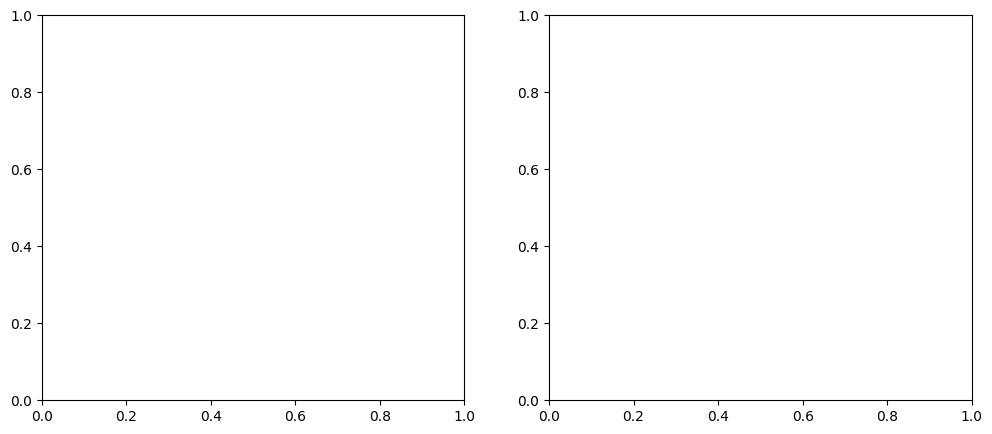

In [2]:
import ipywidgets as widgets
from IPython.display import display

# Input widgets
L_input = widgets.FloatText(value=1.0, description='L (nm):')
R_input = widgets.FloatText(value=0.139, description='R (nm):')
n_max_input = widgets.IntText(value=3, description='n_max:')
particles_input = widgets.IntText(value=6, description='Particles:')
plot_button = widgets.Button(description='Plot')

# Display widgets
display(L_input, R_input, n_max_input, particles_input, plot_button)

# Plot and calculate
def on_plot_button_clicked(b):
    L = L_input.value * 1e-9
    R = R_input.value * 1e-9
    n_max = n_max_input.value
    num_particles = particles_input.value
    if L <= 0 or R <= 0 or n_max < 0 or num_particles < 1:
        print("Error: Invalid input")
        return
    plot_pib(L, n_max, num_particles)
    plot_por(R, n_max, num_particles)
    pib_energy, por_energy, ase = calculate_energies(L, R, num_particles)
    print(f"PIB Energy ({num_particles} particles): {pib_energy:.2e} J")
    print(f"POR Energy ({num_particles} particles): {por_energy:.2e} J")
    print(f"Aromatic Stabilization Energy: {ase:.2e} J")

plot_button.on_click(on_plot_button_clicked)